## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading the Data

In [2]:
dataset=pd.read_excel('Dataset_1.xlsx')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Fluid Flow Rate (m3/s)              146 non-null    float64
 1   Viscosity (Pa.s)                    146 non-null    float64
 2   Density (kg/m3)                     146 non-null    int64  
 3   Surface Area (m2)                   146 non-null    float64
 4   Thermal Conductivity (W/m.K)        146 non-null    float64
 5   Fouling Resistance (m2.K/W)         146 non-null    float64
 6   Reynolds Number                     146 non-null    int64  
 7   Heat Transfer Coefficient (W/m2.K)  146 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 9.2 KB


In [4]:
dataset.describe()

,Fluid Flow Rate (m3/s),Viscosity (Pa.s),Density (kg/m3),Surface Area (m2),Thermal Conductivity (W/m.K),Fouling Resistance (m2.K/W),Reynolds Number,Heat Transfer Coefficient (W/m2.K)
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.917527,0.036973,1103.726027,37.828082,0.271548,0.001709,51341.082192,550.630137
std,2.234620,0.112985,166.066107,45.143779,0.170487,0.001480,62011.027658,545.753475
min,0.012000,0.000570,800.000000,1.000000,0.020000,0.000100,1000.000000,45.000000
25%,0.300000,0.001200,1000.000000,4.425000,0.112500,0.000403,3512.750000,132.500000
50%,1.075000,0.015000,1100.000000,17.250000,0.300000,0.001000,7125.000000,355.000000
75%,2.037500,0.030000,1200.000000,40.750000,0.350000,0.002900,116500.000000,787.500000
max,7.400000,0.800000,2000.000000,149.000000,1.000000,0.005200,185000.000000,2000.000000


## Defining the Features and target

In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Splitting the data into training and test sets

In [6]:
from sklearn.model_selection import train_test_split as tts 
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=10)

## Scaling the Features

In [7]:
from sklearn.preprocessing import StandardScaler as ss
sc=ss()
x_train[:,:]=sc.fit_transform(x_train[:,:])
x_test[:,:]=sc.transform(x_test[:,:])
y_train=sc.fit_transform(y_train[:].reshape(-1,1))
y_test=sc.fit_transform(y_test[:].reshape(-1,1))

In [8]:
print(x_train)

[[-7.14320046e-01 -2.96512886e-01  5.38109904e-01 -7.96212366e-01
  -9.68993432e-01 -9.63772962e-01 -8.04815917e-01]
 [-8.22718489e-01 -3.04304348e-01 -4.04888041e-01 -7.42284397e-01
   2.34221983e-01 -8.96184749e-01 -7.79450821e-01]
 [ 1.72464494e+00 -8.87405709e-02 -3.34040024e-02  1.74289616e+00
   4.63405871e-01  1.19904986e+00  1.14512586e+00]
 [ 7.60852725e-02 -5.41118516e-02  5.38109904e-01  1.47527087e-01
   4.63405871e-01  1.53699093e+00 -6.62137251e-01]
 [-1.42467638e-02 -5.41118516e-02  5.38109904e-01  5.76471390e-02
   4.63405871e-01  1.26663808e+00 -6.77990436e-01]
 [ 1.90530901e+00 -5.41118516e-02  1.95201560e-01  1.92265606e+00
   6.92589760e-01  1.46940272e+00  1.27195134e+00]
 [-8.40784897e-01 -3.07767220e-01 -2.90585260e-01 -7.64754384e-01
   4.63405871e-01 -6.25831895e-01 -8.15913147e-01]
 [ 2.31180317e+00  2.38027666e-02  7.09564076e-01  2.32711582e+00
   1.20825351e+00  2.07769664e+00  1.55730867e+00]
 [-2.17493846e-01 -1.40683650e-01 -3.34040024e-02 -1.44582744e-0

In [9]:
print(x_test)

[[-0.17232783  2.2833267  -0.60491791 -0.79621237  1.32284545 -0.82859654
  -0.79688932]
 [-0.82723509 -0.3069015  -0.6620693  -0.75801339  0.29151795 -0.89618475
  -0.7857921 ]
 [ 1.6343129  -0.10605493 -0.14770678  1.65301621  0.34881393  1.06387344
   1.08171312]
 [ 1.76981095 -0.08008339  0.02374739  1.78783614  0.52070184  1.26663808
   1.17683223]
 [-0.62398801 -0.27919853 -1.17643181 -0.77374238  0.17692601 -1.03136118
  -0.75725636]
 [-0.3529919  -0.29824432 -0.033404   -0.34681263 -1.39298363 -0.01753798
   0.7805026 ]
 [-0.57882199 -0.14068365 -0.033404   -0.50410254 -0.10955385 -0.42306726
  -0.77707284]
 [-0.26265986  0.03245995  1.10962381 -0.18952272  0.74988573  0.52316773
  -0.7215867 ]
 [-0.12716181 -0.30387149 -0.75922666 -0.70633242 -1.16952933 -1.08543175
  -0.72643777]
 [ 1.36331679 -0.15799801 -0.49061513  1.38337637  0.00503809  0.65834416
   0.89147489]
 [-0.75948606 -0.2921843   1.10962381 -0.80744736 -0.68251357 -0.96377296
  -0.79688932]
 [-0.82271849 -0.3025

In [10]:
print(y_train)

[[ 1.23343773]
 [ 1.9838181 ]
 [-0.87700706]
 [-0.09848742]
 [-0.17352546]
 [-0.86199945]
 [ 2.73419847]
 [-0.82823233]
 [-0.34236104]
 [-0.85449565]
 [-0.84699184]
 [-0.22980399]
 [-0.85824755]
 [-0.56747515]
 [-0.86575135]
 [ 2.35900829]
 [-0.07972791]
 [-0.56747515]
 [ 1.04584264]
 [-0.4549181 ]
 [-0.52620423]
 [-0.28608252]
 [-0.77382976]
 [ 1.9838181 ]
 [-0.21104448]
 [-0.49431307]
 [-0.13600644]
 [-0.46429785]
 [-0.17352546]
 [-0.50369282]
 [-0.91452608]
 [ 1.42103282]
 [ 0.85824755]
 [-0.92202988]
 [-0.83573614]
 [-0.92578178]
 [ 1.60862792]
 [ 0.85824755]
 [ 2.35900829]
 [-0.11724693]
 [ 2.17141319]
 [-0.71755123]
 [-0.48493331]
 [-0.28608252]
 [-0.19228497]
 [ 0.20166472]
 [-0.89576657]
 [ 2.35900829]
 [-0.75507025]
 [-0.73631074]
 [-0.91827798]
 [ 0.76445   ]
 [-0.21104448]
 [ 0.67065246]
 [-0.69879172]
 [-0.91077417]
 [-0.51119663]
 [ 2.35900829]
 [-0.81697663]
 [ 1.04584264]
 [ 2.17141319]
 [-0.17352546]
 [ 0.01406963]
 [-0.5580954 ]
 [ 1.23343773]
 [-0.30484203]
 [-0.62375

In [11]:
print(y_test)

[[-0.48401646]
 [ 1.91833419]
 [-0.87697238]
 [-0.86667659]
 [ 0.54556239]
 [ 0.20236944]
 [-0.65561293]
 [-0.41537787]
 [-0.50289207]
 [-0.89756396]
 [ 1.23194829]
 [ 1.57514124]
 [-0.1751428 ]
 [-0.46685681]
 [-0.81004976]
 [ 1.74673771]
 [-0.5011761 ]
 [-0.82892537]
 [-0.05502527]
 [ 1.74673771]
 [-0.89413203]
 [ 2.26152714]
 [-0.88040431]
 [-0.79289011]
 [ 1.06035182]
 [-0.81862958]
 [ 0.45976415]
 [-0.59555416]
 [-0.91815554]
 [-0.31241998]]


## Training the Decision Tree model

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
# define the decision tree regressor
regressor = DecisionTreeRegressor()

### Defining the Hyperparameters

In [13]:
# define the hyperparameters to be tuned
params = {'max_depth': [2, 4, 6, 8, 10], 
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'max_features': [1.0, None]}

### Defining the Scoring Metrics

In [14]:
# define the scoring function
scorer = make_scorer(mean_squared_error, greater_is_better=False)

### Defining the GridSearchCV

In [15]:
# define the grid search with 5-fold cross validation
grid_search = GridSearchCV(estimator=regressor, param_grid=params, scoring=scorer, cv=5)

### Printing the Best Hyperparameters

In [16]:
# fit the grid search to the data
grid_search.fit(x_train, y_train)
# print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4}


### Best model with the Tuned Hyperparameters

In [17]:
# get the best decision tree regressor with the tuned hyperparameters
regressor_best = grid_search.best_estimator_

### Predicting the target variable and comparing the results obtained

In [18]:
# predict the target variable using the best model
y_pred = regressor_best.predict(x_test)
np.set_printoptions(precision=2)
y_pred=sc.inverse_transform(y_pred.reshape(-1,1))
y_test=sc.inverse_transform(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 426.28  300.  ]
 [1847.48 1700.  ]
 [  69.89   71.  ]
 [  76.45   77.  ]
 [1082.22  900.  ]
 [ 672.26  700.  ]
 [ 207.63  200.  ]
 [ 344.29  340.  ]
 [ 309.3   289.  ]
 [  49.12   59.  ]
 [1337.31 1300.  ]
 [1665.28 1500.  ]
 [ 497.95  480.  ]
 [ 344.29  310.  ]
 [ 114.71  110.  ]
 [1665.28 1600.  ]
 [ 292.54  290.  ]
 [  95.76   99.  ]
 [ 672.26  550.  ]
 [1847.48 1600.  ]
 [  60.05   61.  ]
 [2120.79 1900.  ]
 [  60.05   69.  ]
 [ 114.71  120.  ]
 [1337.31 1200.  ]
 [ 105.23  105.  ]
 [ 836.24  850.  ]
 [ 147.51  235.  ]
 [  41.83   47.  ]
 [ 426.28  400.  ]]


## Scoring Metrics

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 8641.301727041448
R2 Score: 0.9745553845234988


## Data Visualisation

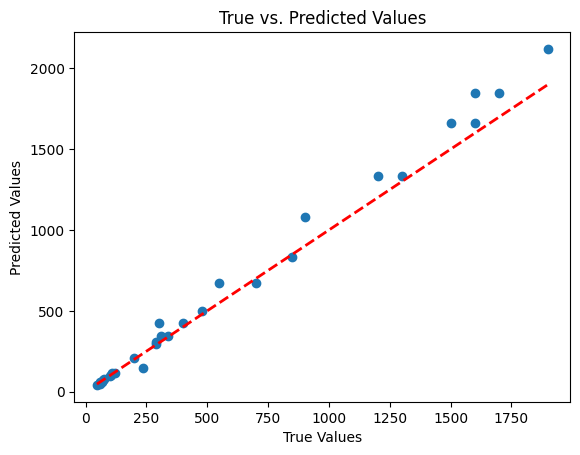

In [20]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

## Residuals Plot

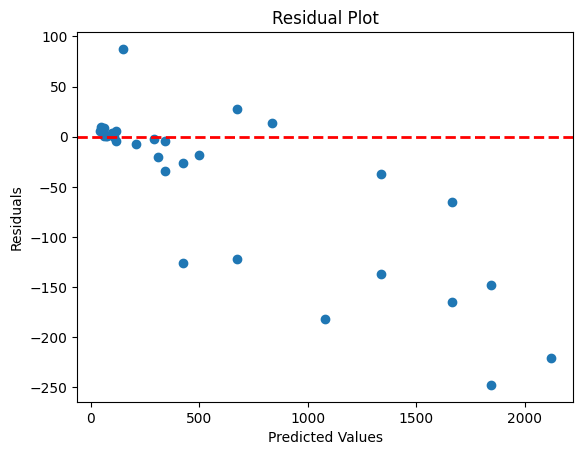

In [21]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Histogram of the Residuals

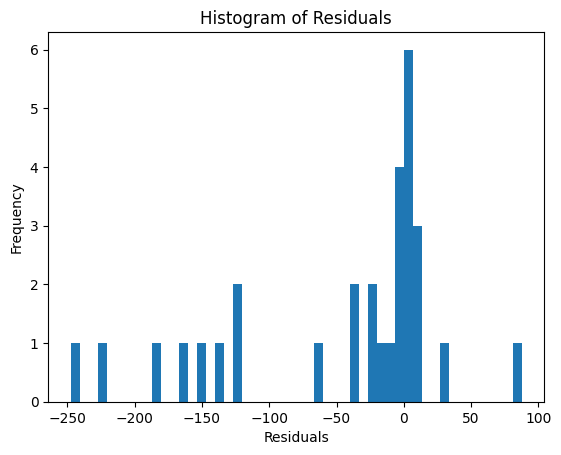

In [22]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()